# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [1]:
#importation des bibliotheques strategiques
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
df=pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()  #affichage des types de donnnees+descriptions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.describe() #ensembles de caractéristiques, tiers, moyennes...

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [4]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])
#absence de valeurs manquantes !

Valeurs manquantes par colonne :
Series([], dtype: int64)


In [5]:
#id : supprimé
df = df.drop(columns=['id'])

In [6]:
#mise a niveau des attributs dont le format n'est pas comparable (date)
#date : tronquer les 4 premiers caracteres (année)
print(df['date'].head())
print(df['date'].dtype)
df['date'] = df['date'].apply(lambda x: int(str(x)[:4]) if pd.notna(x) else x)
print(df['date'].head())
print(df['date'].dtype)



0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object
object
0    2014
1    2014
2    2015
3    2014
4    2015
Name: date, dtype: int64
int64


In [7]:
df = df.drop(columns=['date'])  #que des dates = 2014 et 2015, pertinence --

In [8]:
#yr_renovated : remplacer les 0 (absence de renovations) par date d'annee de construction yr_built 
print(df['yr_renovated'].head(8))
df['yr_renovated'] = df.apply(lambda row: int(row['yr_built']) if row['yr_renovated'] == 0 else int(row['yr_renovated']), axis=1)
print(df['yr_renovated'].head(8))

0       0
1    1991
2       0
3       0
4       0
5       0
6       0
7       0
Name: yr_renovated, dtype: int64
0    1955
1    1991
2    1933
3    1965
4    1987
5    2001
6    1995
7    1963
Name: yr_renovated, dtype: int64


In [9]:
#changer float en int
df['bathrooms'] = df['bathrooms'].apply(lambda x: int(x) if pd.notna(x) else x)
df['price'] = df['price'].apply(lambda x: int(x) if pd.notna(x) else x)
df['floors'] = df['floors'].apply(lambda x: int(x) if pd.notna(x) else x)


In [10]:
df.describe() #verification de l'epuration

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1973.386018,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,28.806854,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

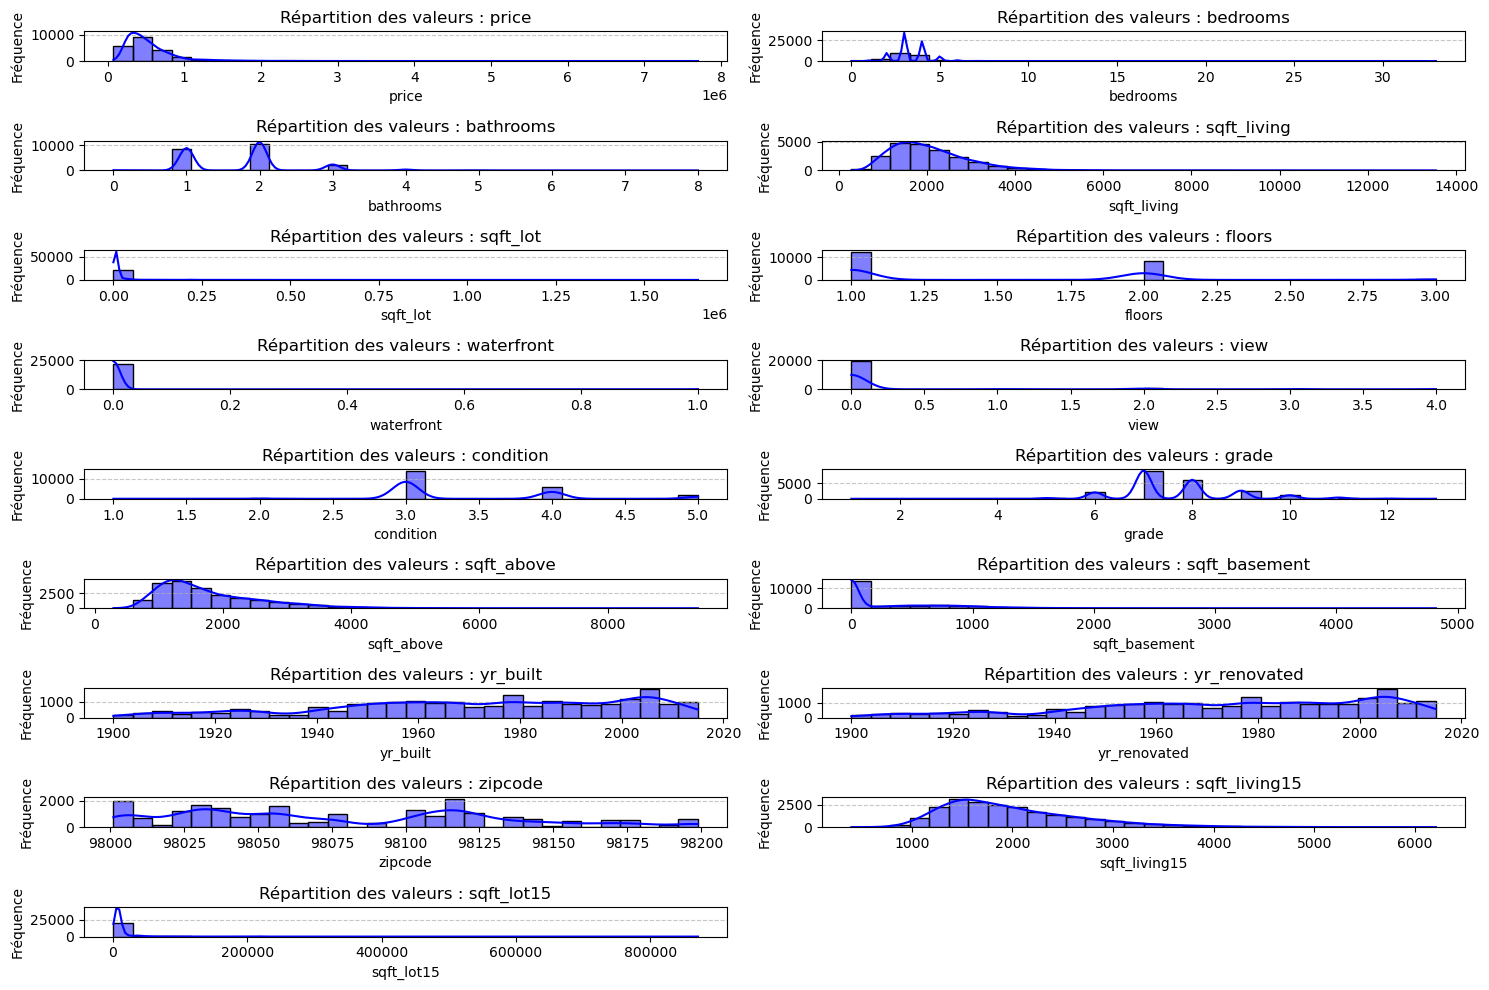

In [11]:
# Liste des colonnes à inclure dans les graphiques
columns_to_plot = [col for col in df.columns if col not in ['lat', 'long']]

# Création des graphiques
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot((len(columns_to_plot) + 1) // 2, 2, i)  # Ajustement dynamique des sous-graphiques
    sb.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Répartition des valeurs : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
# les sqft_lot ont des valeurs immenses qui pourraient représenter des 
# terrains industriels ou commerciaux, on supprime les lignes associées avec 
# les valeurs aberrantes 

# Suppression des valeurs aberrantes pour sqft_lot
def remove_outliers_sqft_lot(data, column):
    Q1 = data[column].quantile(0.25)  # Premier quartile
    Q3 = data[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Interquartile Range
    upper_bound = Q3 + 1.5 * IQR  # Seulement borne supérieure
    return data[data[column] <= upper_bound]  # Filtrer les lignes en-dessous de la borne supérieure

# Supprimer les lignes avec des sqft_lot trop grands
df = remove_outliers_sqft_lot(df, 'sqft_lot')
df = remove_outliers_sqft_lot(df, 'sqft_lot15')
df = remove_outliers_sqft_lot(df, 'sqft_basement')
df = remove_outliers_sqft_lot(df, 'price') 
df = remove_outliers_sqft_lot(df, 'bedrooms')
df = remove_outliers_sqft_lot(df, 'bathrooms')
df = remove_outliers_sqft_lot(df, 'sqft_living')
df = remove_outliers_sqft_lot(df, 'sqft_above')
df = remove_outliers_sqft_lot(df, 'sqft_living')
# Vérifier la nouvelle taille du dataset
print(f"Nombre de lignes après suppression des valeurs aberrantes : {df.shape[0]}")


Nombre de lignes après suppression des valeurs aberrantes : 16548


c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

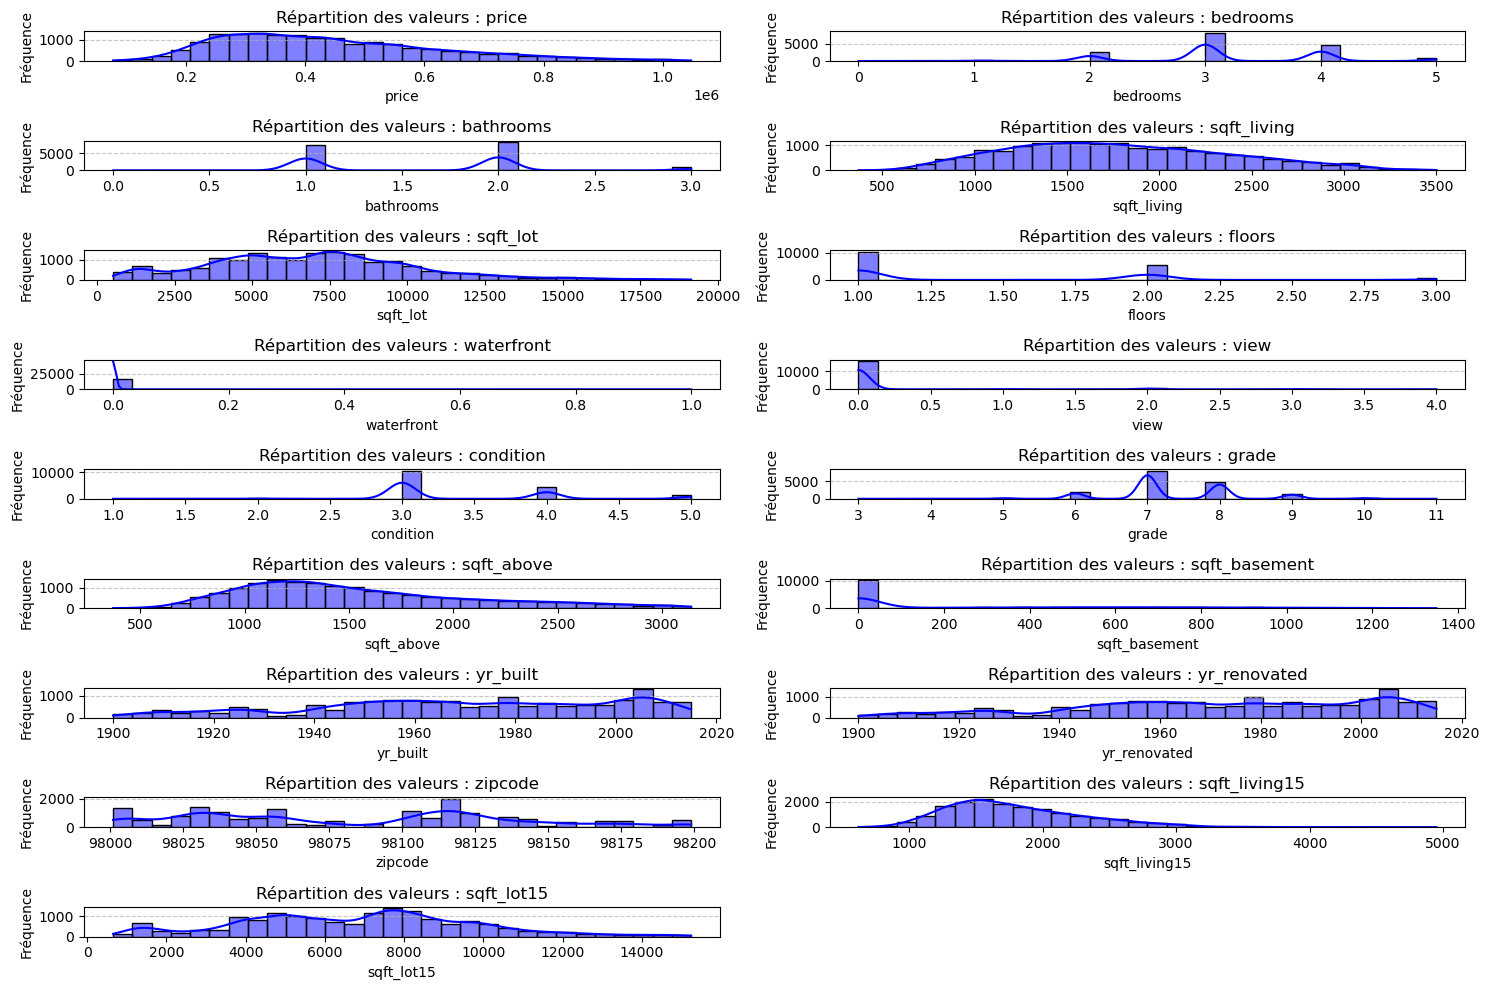

In [13]:
# Liste des colonnes à inclure dans les graphiques
columns_to_plot = [col for col in df.columns if col not in ['lat', 'long']]

# Création des graphiques
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot((len(columns_to_plot) + 1) // 2, 2, i)  # Ajustement dynamique des sous-graphiques
    sb.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Répartition des valeurs : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
'''
variables = outliers_df.index
outliers_count = outliers_df['outliers_count']

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(variables, outliers_count, color='skyblue')
plt.title("Nombre de valeurs aberrantes par variable (méthode IQR)")
plt.xlabel("Variables")
plt.ylabel("Nombre de valeurs aberrantes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
'''

'\nvariables = outliers_df.index\noutliers_count = outliers_df[\'outliers_count\']\n\n# Création du graphique\nplt.figure(figsize=(10, 6))\nplt.bar(variables, outliers_count, color=\'skyblue\')\nplt.title("Nombre de valeurs aberrantes par variable (méthode IQR)")\nplt.xlabel("Variables")\nplt.ylabel("Nombre de valeurs aberrantes")\nplt.xticks(rotation=45)\nplt.grid(axis=\'y\', linestyle=\'--\', alpha=0.7)\nplt.tight_layout()\nplt.show()\n'

# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables 

In [15]:
#idee de correlation
#annee de construction -> note
#annee de renovation -> note
#taille du lot -> taille du lot des voisins (lot15)
#waterfront -> note
#view->watefront

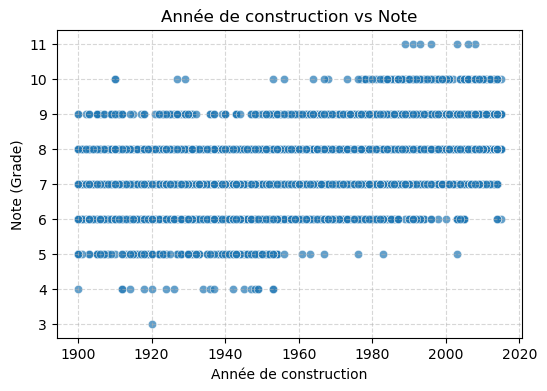

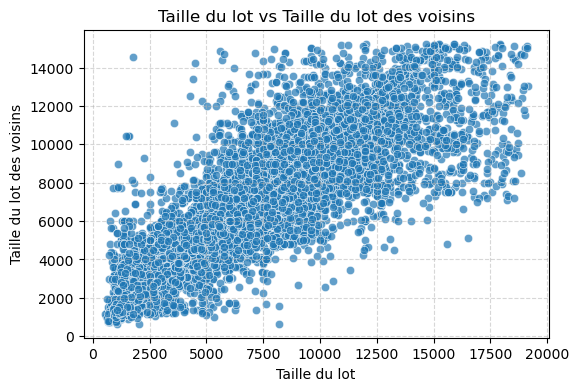

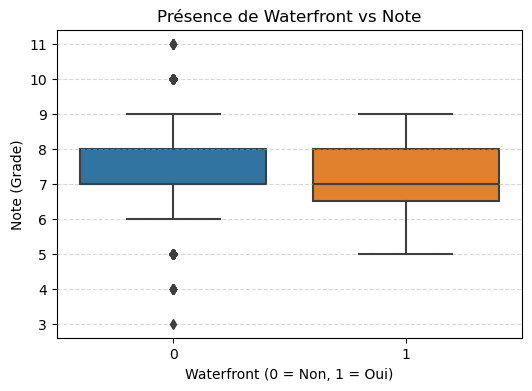

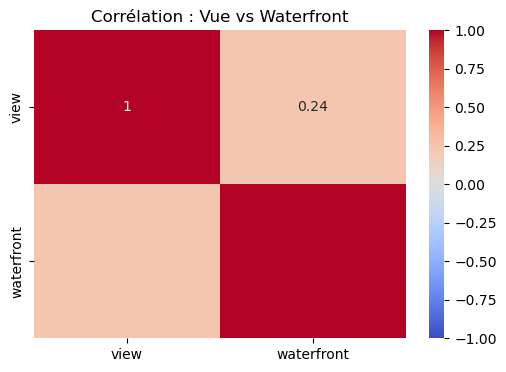

In [16]:
plt.figure(figsize=(6, 4))
sb.scatterplot(x='yr_built', y='grade', data=df, alpha=0.7)
plt.title("Année de construction vs Note")
plt.xlabel("Année de construction")
plt.ylabel("Note (Grade)")
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


# 3. Taille du lot -> Taille du lot des voisins (lot15)
plt.figure(figsize=(6, 4))
sb.scatterplot(x='sqft_lot', y='sqft_lot15', data=df, alpha=0.7)
plt.title("Taille du lot vs Taille du lot des voisins")
plt.xlabel("Taille du lot")
plt.ylabel("Taille du lot des voisins")
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

# 4. Waterfront -> Note (Grade)
plt.figure(figsize=(6, 4))
sb.boxplot(x='waterfront', y='grade', data=df)
plt.title("Présence de Waterfront vs Note")
plt.xlabel("Waterfront (0 = Non, 1 = Oui)")
plt.ylabel("Note (Grade)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(6, 4))
correlation_matrix = df[['view', 'waterfront']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Corrélation : Vue vs Waterfront")
plt.show()

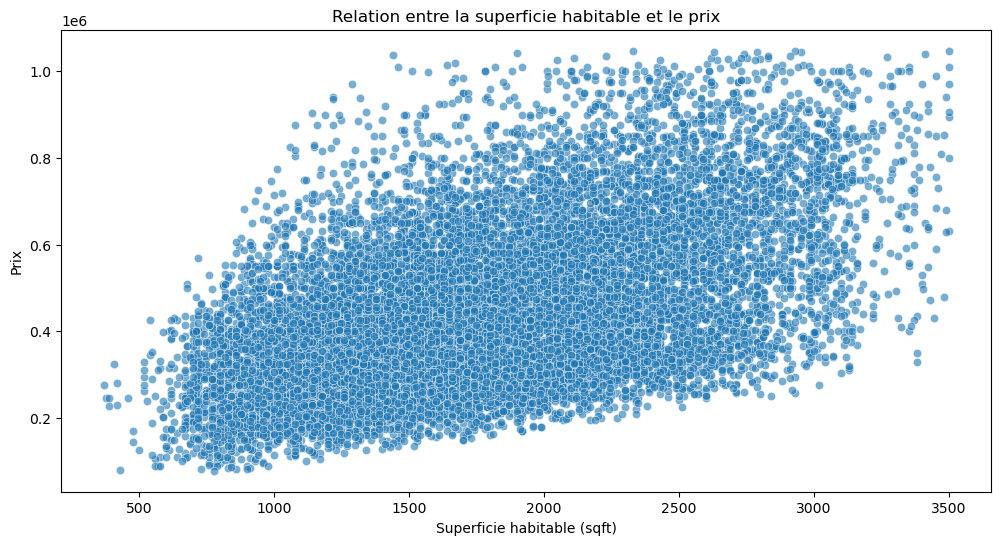

In [17]:
# Relation entre prix et superficie habitable
plt.figure(figsize=(12, 6))
sb.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title("Relation entre la superficie habitable et le prix")
plt.xlabel("Superficie habitable (sqft)")
plt.ylabel("Prix")
plt.show()

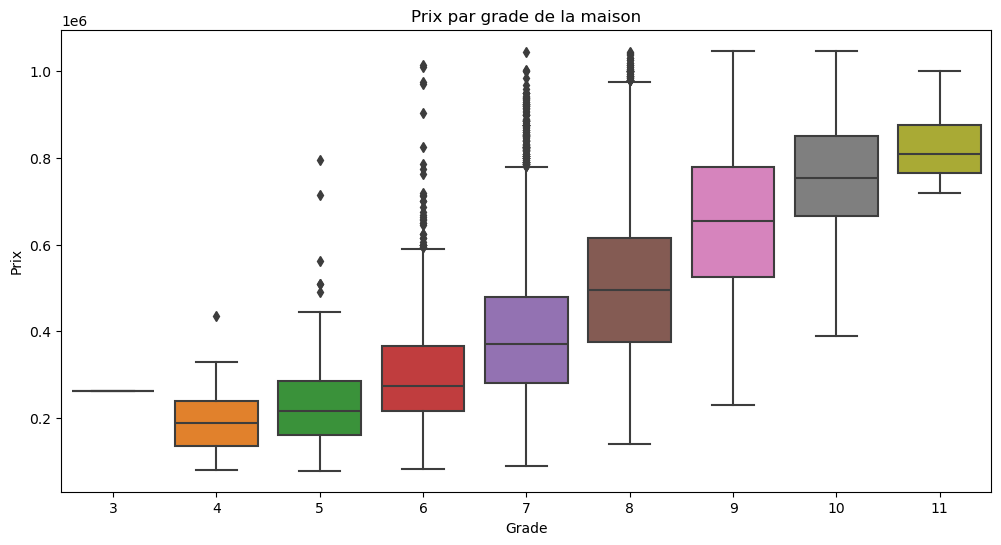

In [18]:
# Relation entre prix et grade
plt.figure(figsize=(12, 6))
sb.boxplot(x='grade', y='price', data=df)
plt.title("Prix par grade de la maison")
plt.xlabel("Grade")
plt.ylabel("Prix")
plt.show()

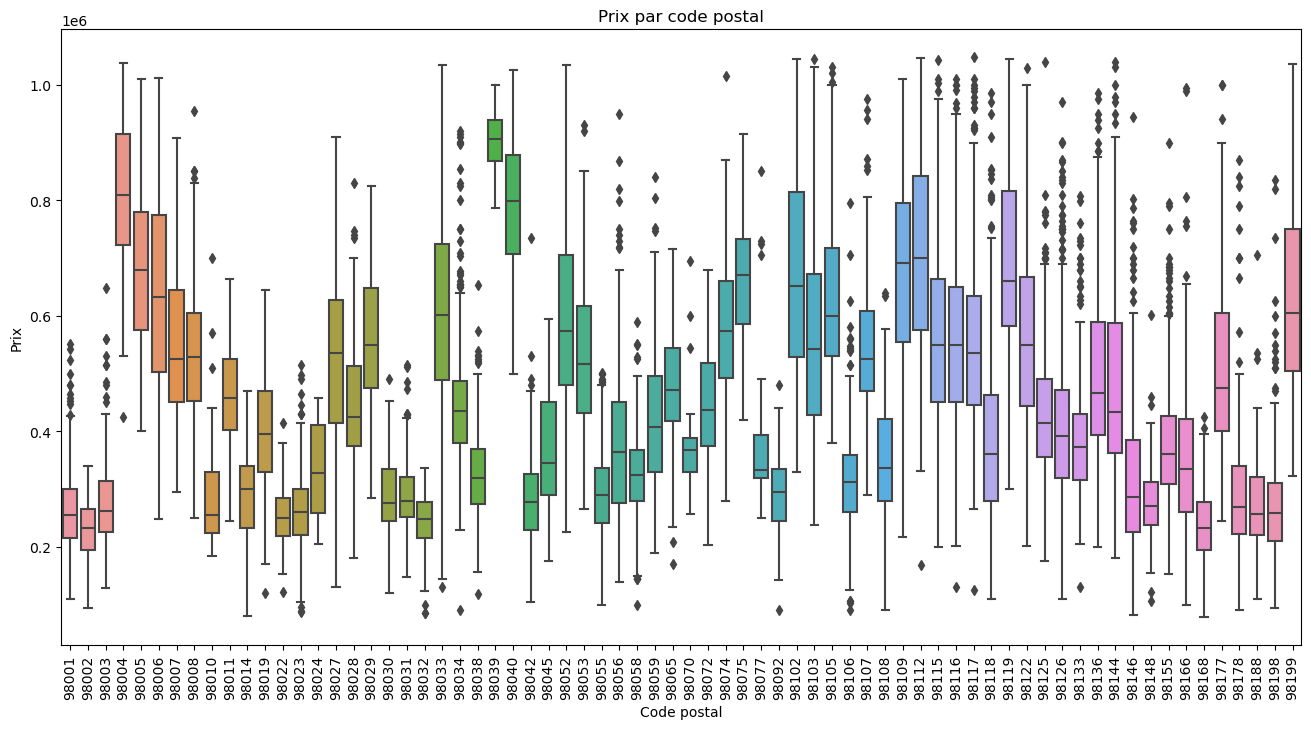

In [19]:
# Relation entre prix et code postal (zipcode)
plt.figure(figsize=(16, 8))
sb.boxplot(x='zipcode', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Prix par code postal")
plt.xlabel("Code postal")
plt.ylabel("Prix")
plt.show()

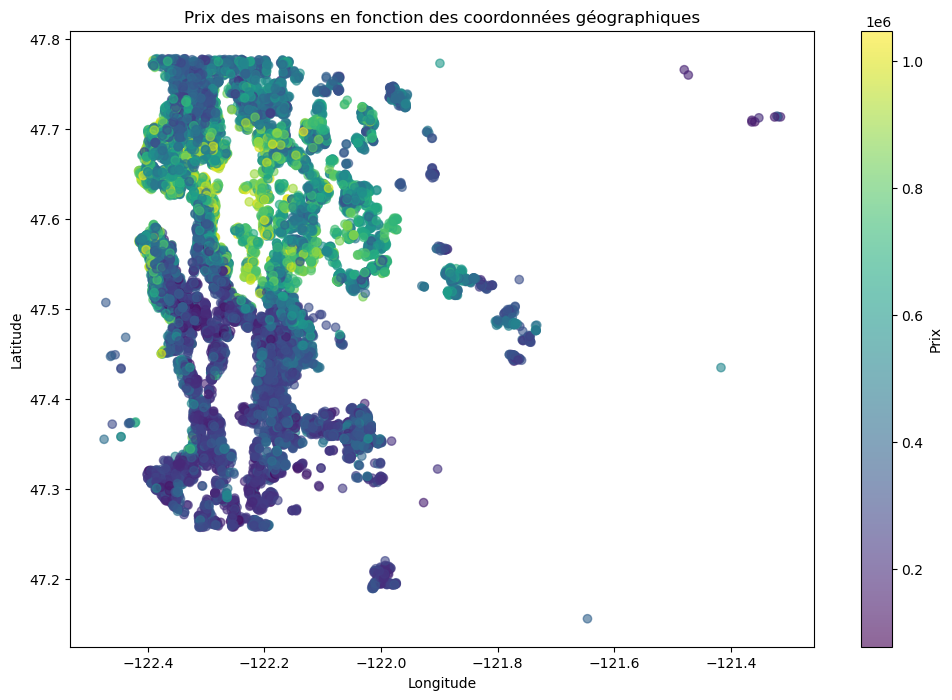

In [20]:
# Visualisation des prix en fonction des coordonnées géographiques
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=df['long'], y=df['lat'], c=df['price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Prix')
plt.title("Prix des maisons en fonction des coordonnées géographiques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

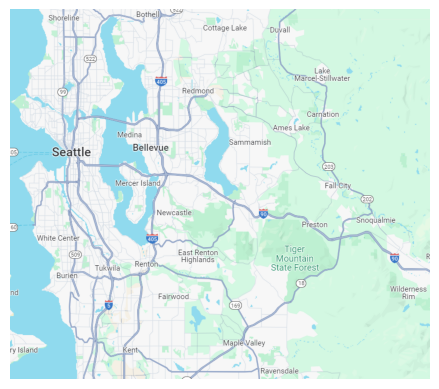

In [21]:
#Comparaison avec une carte de King County à Seattle :

import matplotlib.image as mpimg

# Charger l'image PNG
image_path = "Carte_Seattle.png"
image = mpimg.imread(image_path)

# Afficher l'image dans une figure
plt.imshow(image)
plt.axis('off')  # Supprime les axes pour ne montrer que l'image
plt.show()


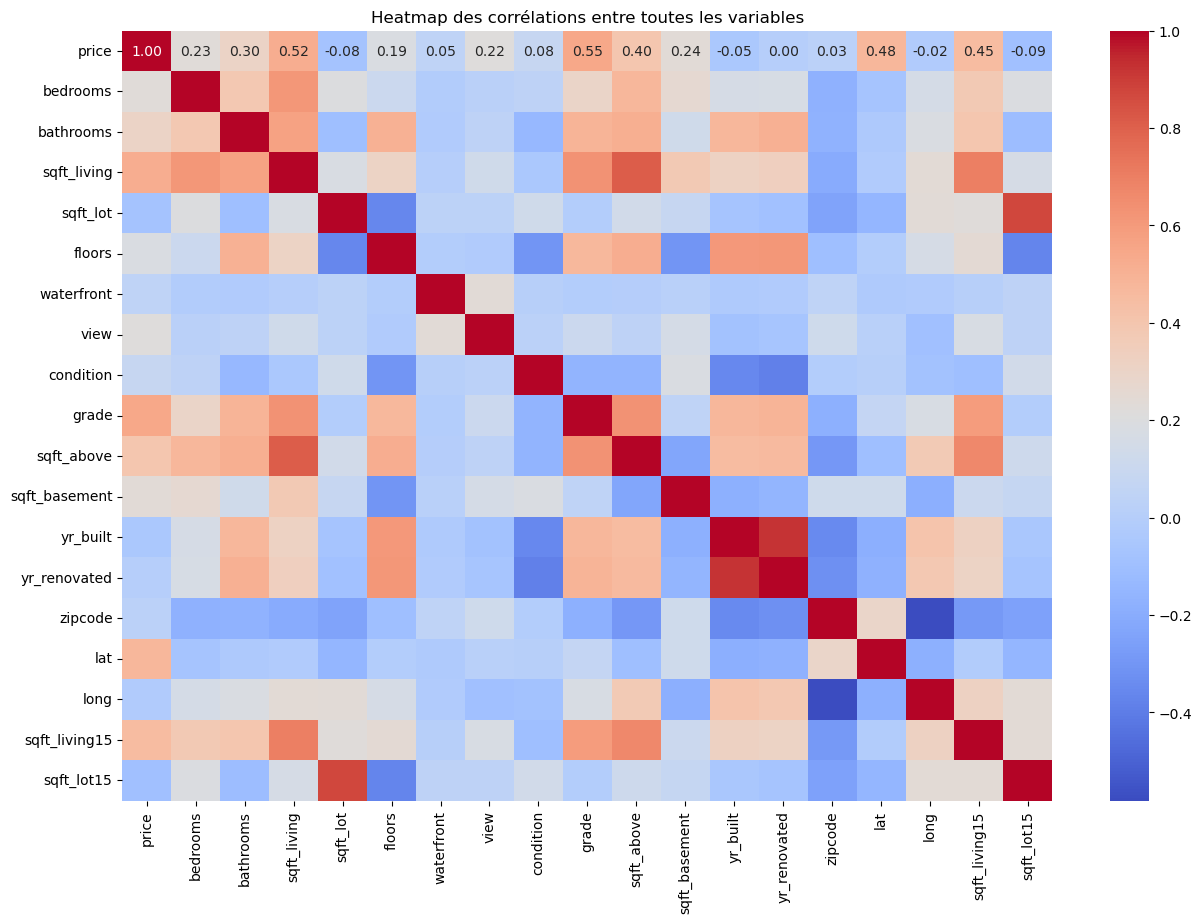

In [22]:
correlation_matrix = df.corr()

# Créer une heatmap pour toutes les variables
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap des corrélations entre toutes les variables")
plt.show()

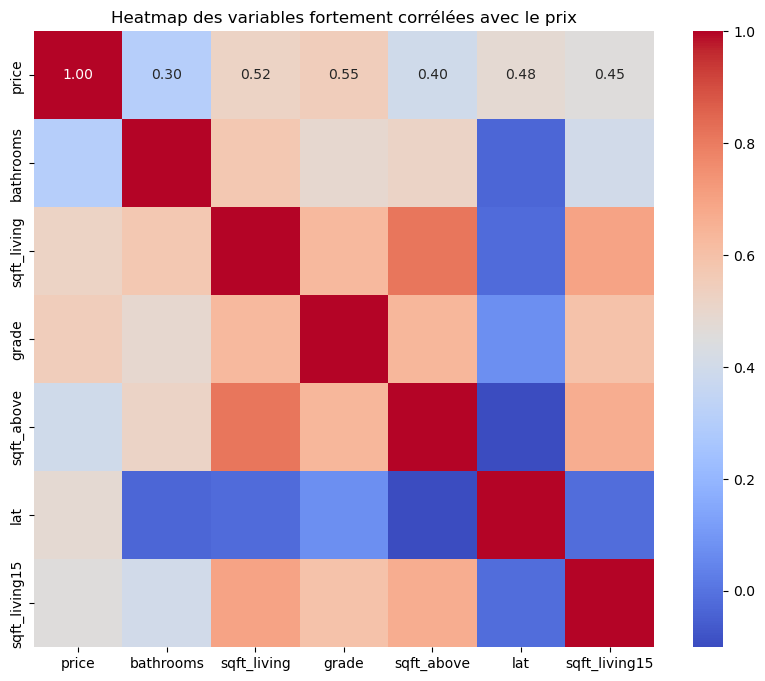

In [23]:
# Filtrer les variables avec une corrélation forte avec le prix
threshold = 0.3
strong_corr = correlation_matrix['price'][abs(correlation_matrix['price']) > threshold]

# Sélectionner ces variables
strong_corr_variables = strong_corr.index
filtered_corr_matrix = correlation_matrix.loc[strong_corr_variables, strong_corr_variables]

# Créer une heatmap pour les variables fortement corrélées avec le prix
plt.figure(figsize=(10, 8))
sb.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap des variables fortement corrélées avec le prix")
plt.show()


c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

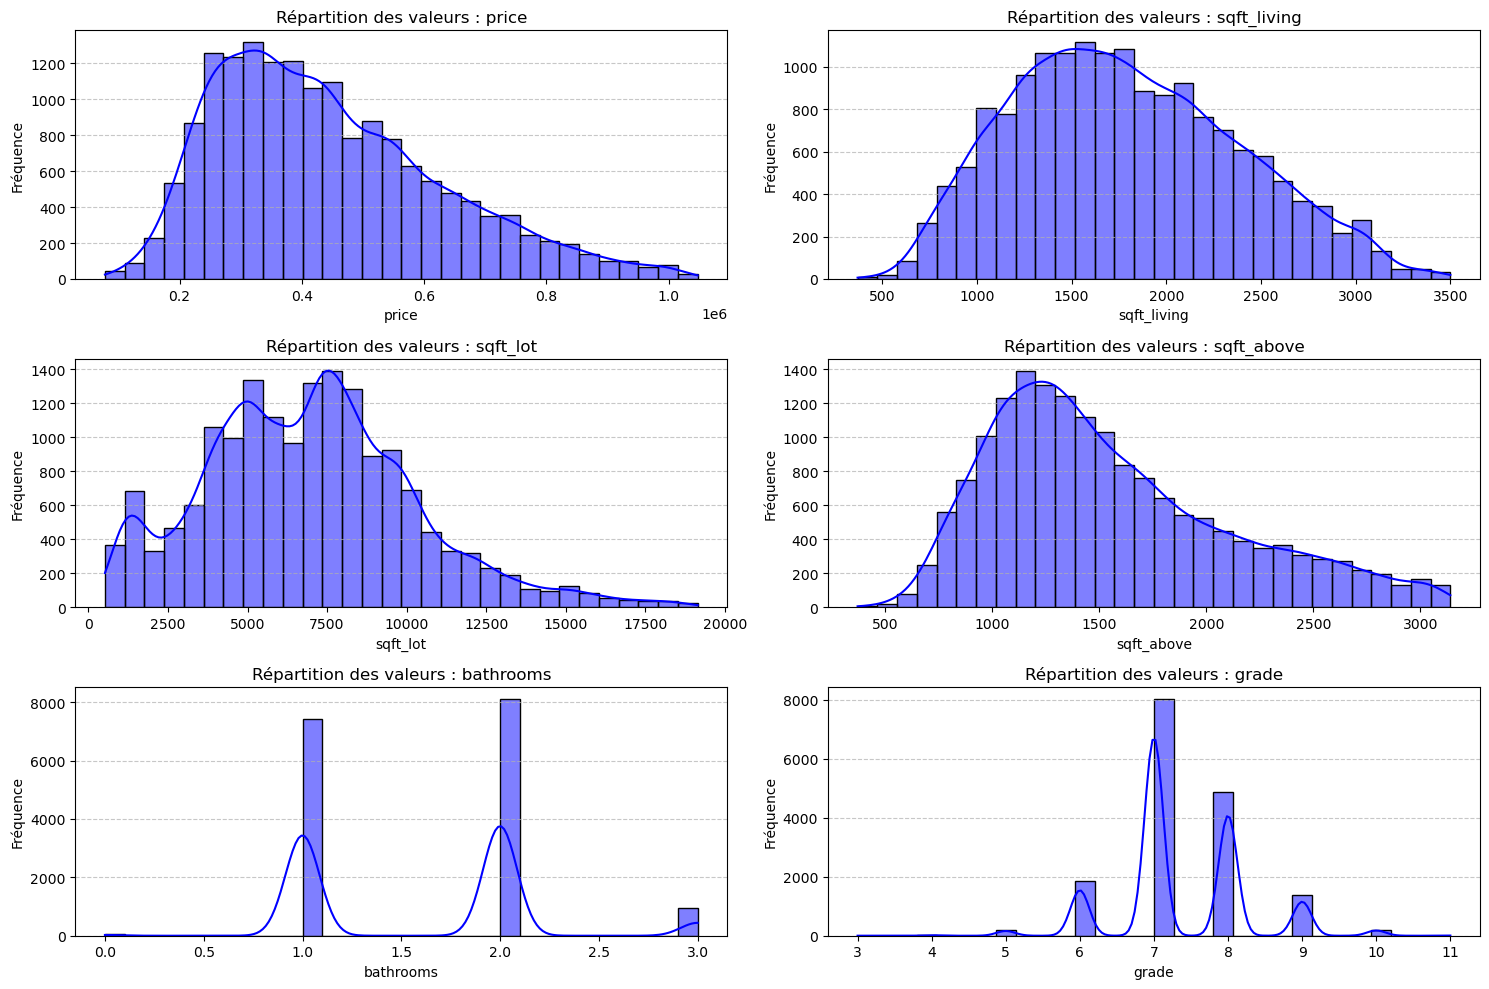

In [24]:
#selection des correlations les plus pertinentes selon heatmap precedentes
columns_to_visualize = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'bathrooms', 'grade']

# Créer des graphiques pour chaque colonne
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)
    sb.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Répartition des valeurs : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
columns_to_keep = strong_corr.index
df = df[columns_to_keep]

# Afficher les colonnes restantes
print(f"Colonnes retenues : {list(df.columns)}")
print(f"Taille du DataFrame après filtrage : {df.shape}")


Colonnes retenues : ['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
Taille du DataFrame après filtrage : (16548, 7)


# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#colonnes selection= 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'bathrooms', 'grade'
# X = df.drop(columns=['id', 'price', 'date', 'lat', 'long'])  # Caractéristiques (features), en excluant la colonne cible
X = df.drop(columns=['price'])
y = df['price']  # Variable cible (target)

y_bins = pd.qcut(y, q=4, labels=False)
# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_bins)

print("Ensemble d'entraînement :", X_train.shape)
print("Ensemble de test :", X_test.shape)


# Identifier les colonnes catégoriques
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
# OneHotEncoding pour les colonnes catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Ensemble d'entraînement : (13238, 6)
Ensemble de test : (3310, 6)


# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def entrainement_model (model):
    model.fit(X_train_encoded, y_train)

    # Prédire les valeurs sur l'ensemble d'entraînement et de test
    y_train_pred = model.predict(X_train_encoded)
    y_test_pred = model.predict(X_test_encoded)

    # Évaluer les performances du modèle
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Afficher les métriques de performance
    print(f"Performances avec {model.__class__.__name__} :")
    print(f"  - RMSE entraînement : {train_rmse:.2f}")
    print(f"  - R² entraînement   : {train_r2:.2f}")
    print(f"  - RMSE test         : {test_rmse:.2f}")
    print(f"  - R² test           : {test_r2:.2f}")
    pourcentage_reussite(y_test, y_test_pred, seuil=0.2)

def pourcentage_reussite(y_test, y_test_pred, seuil):
    # Calculer la différence relative entre les valeurs réelles et prédites
    differences = np.abs(y_test - y_test_pred) / y_test
    # Calculer le pourcentage de prédictions qui sont inférieures au seuil
    correct_predictions = (differences < seuil).sum()
    total_predictions = len(y_test)
    pourcentage = (correct_predictions / total_predictions) * 100

    print(f"Pourcentage de réussite (valeurs proches à {seuil*100}%) : {pourcentage:.2f}%")

def affichage_graph_reussite(X_test_scaled):
    # Prédictions sur l'ensemble de test
    y_test_pred = model.predict(X_test_scaled)

    # Graphique 1: Prédictions vs Réels
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne d'identité
    plt.title('Prédictions vs Valeurs réelles')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.show()

    # Graphique 2: Résidus
    residuals = y_test - y_test_pred
    plt.figure(figsize=(8, 6))
    sb.scatterplot(x=y_test_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Graphique des résidus')
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    plt.show()

    # Graphique 3: Histogramme des résidus
    plt.figure(figsize=(8, 6))
    sb.histplot(residuals, kde=True, color='blue', bins=30)
    plt.title('Histogramme des résidus')
    plt.xlabel('Résidus')
    plt.ylabel('Fréquence')
    plt.show()

model = LinearRegression()
entrainement_model(model)
#affichage_graph_reussite(X_test_encoded)

Performances avec LinearRegression :
  - RMSE entraînement : 120142.23
  - R² entraînement   : 0.57
  - RMSE test         : 123797.53
  - R² test           : 0.56
Pourcentage de réussite (valeurs proches à 20.0%) : 53.41%


# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

In [28]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
entrainement_model(model_rf)

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
entrainement_model(model_xgb)

model_knn = KNeighborsRegressor(n_neighbors=5)
entrainement_model(model_knn)

model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)
entrainement_model(model_en)

model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
entrainement_model(model_mlp)

Performances avec RandomForestRegressor :
  - RMSE entraînement : 33586.24
  - R² entraînement   : 0.97
  - RMSE test         : 88652.73
  - R² test           : 0.77
Pourcentage de réussite (valeurs proches à 20.0%) : 75.71%
Performances avec XGBRegressor :
  - RMSE entraînement : 72924.69
  - R² entraînement   : 0.84
  - RMSE test         : 87063.58
  - R² test           : 0.78
Pourcentage de réussite (valeurs proches à 20.0%) : 77.01%
Performances avec KNeighborsRegressor :
  - RMSE entraînement : 78247.99
  - R² entraînement   : 0.82
  - RMSE test         : 98916.11
  - R² test           : 0.72
Pourcentage de réussite (valeurs proches à 20.0%) : 71.33%
Performances avec ElasticNet :
  - RMSE entraînement : 126193.15
  - R² entraînement   : 0.53
  - RMSE test         : 129539.55
  - R² test           : 0.52
Pourcentage de réussite (valeurs proches à 20.0%) : 47.95%
Performances avec MLPRegressor :
  - RMSE entraînement : 166951.42
  - R² entraînement   : 0.18
  - RMSE test         : 

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


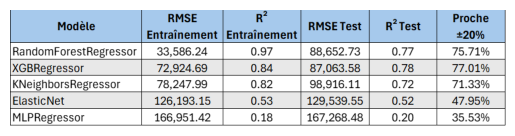

In [40]:
import matplotlib.image as mpimg

# Charger l'image PNG
image_path = "ComparaisonAlgos.png"
image = mpimg.imread(image_path)

# Afficher l'image dans une figure
plt.imshow(image)
plt.axis('off')  # Supprime les axes pour ne montrer que l'image
plt.show()

Comparaison des algos :
Analyse des performances :
1. RandomForestRegressor :
Performances globalement solides, ce modèle est fiable dans ce contexte. Un ajustement des hyperparamètres (par exemple, max_depth, min_samples_split) pourrait réduire l'écart.
2. XGBRegressor :
Meilleur pourcentage de réussite (77.01%).
Ce modèle offre une performance robuste et semble moins sujet au surapprentissage que RandomForest. Il pourrait devenir un choix optimal après optimisation.
3. KNeighborsRegressor :
Simplicité du modèle.
Scores R² modérés (entraînement : 0.82, test : 0.72) et RMSE élevés (test : 98,916.11).
Le pourcentage de réussite (71.33%) est plus faible que RandomForest et XGBoost.
Conclusion :
Moins performant que les modèles basés sur les arbres, non retenu
4. ElasticNet :
R² faible (entraînement : 0.53, test : 0.52), montrant qu'il ne capture pas bien la complexité des données.
RMSE élevé (129,539.55) et faible pourcentage de réussite (47.95%).
Non retenu
5. MLPRegressor :
Scores R² très faibles (entraînement : 0.18, test : 0.20).
RMSE élevé (167,268.48) et très faible pourcentage de réussite (35.53%).
Le réseau de neurones n'a pas convergé correctement

Les modèles RandomForest et XGBoost se démarquent en termes de précision et de robustesse.
XGBoost semble légèrement supérieur en test, avec le meilleur pourcentage de réussite (77.01%).
Les autres modèles (KNN, ElasticNet, MLP) sont moins performants et pourraient être écartés.

# 7. Clustering
• Appliquer l'algorithme K-means pour regrouper les données en des clusters
(groupes)
• Visualiser les clusters et interpréter les résultats

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


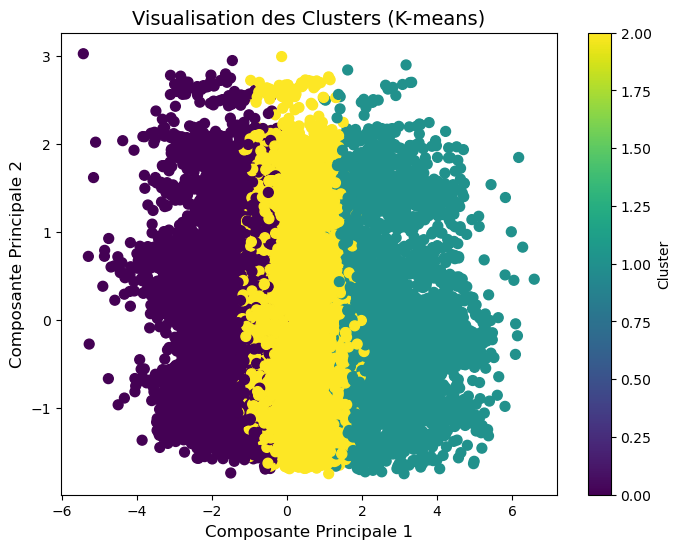

Centres des clusters :
[[-0.95377243 -0.81410335 -0.71489763 -0.73889483  0.04116851 -0.65548001]
 [ 0.82660971  1.32342879  1.14479907  1.45930617 -0.14715253  1.30211688]
 [ 0.53264038  0.11811261  0.11317388 -0.03339714  0.03772425 -0.03374112]]


c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\clust

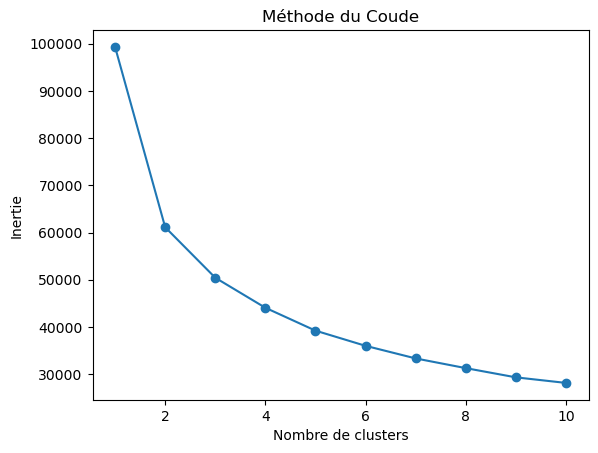

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Vous pouvez ajuster n_clusters
kmeans.fit(X_scaled)

# Récupérer les clusters (labels)
clusters = kmeans.labels_

# Ajouter les clusters comme nouvelle colonne au DataFrame
df['Cluster'] = clusters

# Visualisation des clusters
# Réduction de la dimensionnalité à 2D pour une visualisation (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le graphique des clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Visualisation des Clusters (K-means)', fontsize=14)
plt.xlabel('Composante Principale 1', fontsize=12)
plt.ylabel('Composante Principale 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)

# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


In [42]:
def estimation_prix_maison(nouvelle_maison, model, preprocessor):
    # Convertir le dictionnaire en DataFrame
    nouvelle_maison_df = pd.DataFrame([nouvelle_maison])

    # Appliquer le préprocesseur sur la nouvelle maison
    nouvelle_maison_encoded = preprocessor.transform(nouvelle_maison_df)

    prix_estime = model.predict(nouvelle_maison_encoded)
    return prix_estime[0]

nouvelle_maison = {
    "bedrooms": 3,
    "bathrooms": 1,
    "sqft_living": 1180,
    "sqft_lot": 5650,
    "floors": 1,
    "waterfront": 0,
    "view": 0,
    "condition": 3,
    "grade": 7,
    "sqft_above": 1180,
    "sqft_basement": 0,
    "yr_built": 1955,
    "yr_renovated": 0,
    "zipcode": "98178",
    "lat": 47.5112,
    "long": -122.257,
    "sqft_living15": 1340,
    "sqft_lot15": 5650
}#prix attendu 221900

# Estimation du prix
prix_estime = estimation_prix_maison(nouvelle_maison, model_rf, preprocessor)
print(f"Le prix estimé de la maison est : ${prix_estime:,.2f} pour $221,900")

Le prix estimé de la maison est : $253,483.00 pour $221,900


In [43]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model_xgb, file)
with open("preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

In [44]:
#streamlit run app_streamlit.py

# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats

Lors de notre analyse préliminaire des données, nous avons tout d'abord cherché à normaliser et nettoyer les données.
En effet, nous avons décidé de supprimer les colonnes non pertinentes, comme l'identifiant et la date de l'étude.

Nous avons aussi cherché à transformer certaines données pour les rendre analysables, comme l'année de reconstruction, ou encore certaines valeurs réelles que l'on a transformées en valeurs entières, comme la surface et le prix.

Nous avons ensuite cherché à supprimer les valeurs aberrantes avec la méthode "interquatile range" (IQR). Les données affectées concernaient principalement les surfaces, les prix et le nombre de chambres, certaines valeurs pouvant être associées à des propriétés d'exception.

Une fois les données bien nettoyées et normalisées, nous avons cherché à les analyser afin d'en extraire les répartitions et les corrélations.
Des graphiques comme des heatmaps ou des scatterplots nous ont particulièrement permis de trouver des corrélations entre certaines données, comme le prix, la note ou les surfaces.

Nous avons ensuite cherché à préparer la modélisation des données en divisant ces dernières en ensembles de tests, avec 80% servant à entraîner les modèles, et les 20% restants permettant de tester l'efficacité du modèle concerné.
On a ensuite encodé les valeurs en supprimant l'en-tête.

On a fait ensuite la régression linéaire, en calculant le R² et le RMSE, et on a déterminé que ce n'était pas très efficace pour notre domaine de prédiction.

On a ensuite déployé d'autres algorithmes de machine learning, comme le "random forest regressor", le "xgboost", le KNN, le filet élastique, et le MLP regressor.
Après comparaison, on a observé que la régression xgboost était celle retenue, ayant obtenu les meilleurs résultats.

On arrive à prédire le prix des maisons à moins de 15% d'erreur. Nous sommes donc satisfaits avec ce modèle et avons déployé l'application streamlight pour une meilleure saisie des données d'entrée.